<a href="https://colab.research.google.com/github/femyelizabeth/myfirst/blob/main/bookproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
%matplotlib inline
#Import package for pandas dataframe
import pandas as pd
# Import the regular expression module
import re

In [45]:
r = pd.read_csv( '/content/ratings.csv' ) # ratings for different books
b = pd.read_csv( '/content/books.csv' ) # list of books and necessary infor about the books
t = pd.read_csv( '/content/tags.csv')  # Tag id and Tag names  used by readers to shelve a book
bt = pd.read_csv( '/content/book_tags.csv') #Records of tags received by different books
tr = pd.read_csv( '/content/to_read.csv')# books marked by users as to read

In [ ]:
len(r)

981756

In [ ]:
r.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [ ]:
r.isnull().values.any()

False

In [ ]:
len(b)

10000

In [ ]:
b.head().T

,0,1,2,3,4
id,1,2,3,4,5
book_id,2767052,3,41865,2657,4671
best_book_id,2767052,3,41865,2657,4671
work_id,2792775,4640799,3212258,3275794,245494
books_count,272,491,226,487,1356
isbn,439023483,439554934,316015849,61120081,743273567
isbn13,9780439023480.0,9780439554930.0,9780316015840.0,9780061120080.0,9780743273560.0
authors,Suzanne Collins,"J.K. Rowling, Mary GrandPré",Stephenie Meyer,Harper Lee,F. Scott Fitzgerald
original_publication_year,2008.0,1997.0,2005.0,1960.0,1925.0
original_title,The Hunger Games,Harry Potter and the Philosopher's Stone,Twilight,To Kill a Mockingbird,The Great Gatsby


In [46]:
b=b.rename(columns={'book_id':'goodreads_book_id'})
b.head().T

,0,1,2,3,4
id,1,2,3,4,5
goodreads_book_id,2767052,3,41865,2657,4671
best_book_id,2767052,3,41865,2657,4671
work_id,2792775,4640799,3212258,3275794,245494
books_count,272,491,226,487,1356
isbn,439023483,439554934,316015849,61120081,743273567
isbn13,9780439023480.0,9780439554930.0,9780316015840.0,9780061120080.0,9780743273560.0
authors,Suzanne Collins,"J.K. Rowling, Mary GrandPré",Stephenie Meyer,Harper Lee,F. Scott Fitzgerald
original_publication_year,2008.0,1997.0,2005.0,1960.0,1925.0
original_title,The Hunger Games,Harry Potter and the Philosopher's Stone,Twilight,To Kill a Mockingbird,The Great Gatsby


In [47]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [48]:
b.loc[b.duplicated(keep = False),:]

,id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url


In [ ]:
len(t)

34252

In [ ]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [49]:
t.loc[t.duplicated(keep = False),:]

,tag_id,tag_name


In [50]:
if sorted(set(b.goodreads_book_id)) == sorted(set(r.book_id)):
    print("The book_id column contains same elements, so it can be used to connect the two datasets")

In [51]:
r.nunique()

book_id    10000
user_id    53424
rating         5
dtype: int64

In [52]:
t.tail(10)

,tag_id,tag_name
34242,34242,漫画
34243,34243,골든
34244,34244,﹏moonplus-reader﹏
34245,34245,ﺭﺿﻮﻯ-عاشور
34246,34246,ﻳﻮﺳﻒ-زيدان
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [53]:
bt = bt.drop_duplicates()

In [64]:
bt = bt.merge( t, on = 'tag_id' )

In [54]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [67]:
tag_table = bt.merge(b[['goodreads_book_id', 'title']], on = 'goodreads_book_id')
tag_table.head()

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...


In [62]:
print(bt.columns)

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')


In [68]:
b=b.rename(columns={'id':'book_id'})


In [58]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [69]:
tag_table.head()

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...


In [65]:
tag_table.tag_name.nunique()

AttributeError: ignored

In [70]:
#Lets filter out rows with non - ascii characters
non_ascii_tags = tag_table[tag_table['tag_name'].str.contains(r'[^\x00-\x7F]+')]
tag_table =tag_table[~tag_table['tag_name'].str.contains(r'[^\x00-\x7F]+')]

#Lets check the size after applying the filter
tag_table.tag_name.nunique()

32963

In [71]:
#Lets filter out rows with non - ascii characters from the title
non_ascii_title = tag_table[tag_table['title'].str.contains(r'[^\x00-\x7F]+')]
tag_table =tag_table[~tag_table['title'].str.contains(r'[^\x00-\x7F]+')]

#Lets check the size after applying the filter
tag_table.title.nunique()

9814

In [72]:
# lets check the statistics for frequency of these tags in the book_id dataset
tag_table.tag_name.value_counts(dropna=False).describe()

count    32405.000000
mean        30.288196
std        281.439575
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       9834.000000
Name: tag_name, dtype: float64

In [73]:
def popular_tags (tagname,M):
    if tagname in List:
        return tagname

tag_table_shortened = tag_table[['goodreads_book_id','tag_id','tag_name']]
books_per_tag = tag_table_shortened.groupby(['tag_id','tag_name']).count().sort_values(by='goodreads_book_id',ascending = False)
books_per_tag.rename(columns = {'goodreads_book_id':'Number of Books'}, inplace = True)
books_per_tag.head()

,,Number of Books
tag_id,tag_name,
30574,to-read,9834
11557,favorites,9734
22743,owned,9711
5207,books-i-own,9660
8717,currently-reading,9631


In [74]:
tags_to_keep = books_per_tag.index[books_per_tag['Number of Books']>300].tolist()
tag_id_to_keep, tag_names_to_keep = zip(*tags_to_keep)
len(set(tag_names_to_keep))
len(set(tag_id_to_keep))

500

In [75]:
# Define a function to create a Boolean Mask
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = True
    else:
        dataframe = False
    return dataframe
# Apply the function defined above to make a boolean mask based on tag_id_to_keep
Filter = tag_table.tag_id.apply(lambda x:Filtered(x,tag_id_to_keep ))
# Use the boolean mask to filter data
tag_table = tag_table[Filter]
# Use the boolean mask to filter data
tag_table.nunique()

goodreads_book_id    9850
tag_id                500
count                9305
tag_name              500
title                9814
dtype: int64

In [76]:
tag_table.tag_name[50:100]

55                my-favorites
56                      own-it
57             childrens-books
58                     library
59                       audio
60         young-adult-fiction
61                       novel
62                        2005
63               scifi-fantasy
65                       faves
66             favorite-series
67                read-in-2015
68                 made-me-cry
69                    juvenile
70          shelfari-favorites
71                      kindle
72                       youth
73                     romance
74                   favourite
75                      to-buy
76                read-in-2014
77                  to-re-read
79         childhood-favorites
80                  kids-books
81                       ebook
83                contemporary
84             read-in-english
85                      5-star
86               coming-of-age
87     science-fiction-fantasy
88                read-in-2017
89                     england
90      

In [77]:
prog = re.compile('\w*[-]?[Ff]av\w*')
Favorites = []
for row in tag_table.tag_name[50:200]:
    result = prog.match(row)
    if bool(result) and row not in Favorites:
        Favorites.append(row)

In [78]:
Favorites

['my-favorites',
 'faves',
 'favorite-series',
 'shelfari-favorites',
 'favourite',
 'childhood-favorites',
 'favs',
 'favorites',
 'favourites',
 'favorite']

In [79]:
def identify_custom_categories (tagname, pattern):
    prog = re.compile(pattern)
    matched_tags = []
    for row in tagname:
        result = prog.match(row)
        if bool(result) and row not in matched_tags:
            matched_tags.append(row)
    return matched_tags

def replace_custom_categories(tag_name, custom_names, preferred_category_name):
    if tag_name in custom_names:
        tag_name = preferred_category_name
    return tag_name

In [80]:
# Identify custom tag_names for favorite
pattern_for_Favorites = '\w*[-]?\w*[-]?[Ff]av\w*'
custom_tags_for_favorites = identify_custom_categories(tag_table.tag_name, str(pattern_for_Favorites))

In [81]:
# Rename the custom tag_names as Favorite
preferred_name = 'Favorite'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_favorites,preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos  = {}
KW_CategorY_Repos ['Category'] = ['Favorite']
KW_CategorY_Repos ['Possible Search KW'] = []
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for_favorites)

In [82]:
# Check the size after filtering
tag_table.tag_name.nunique()
KW_CategorY_Repos

{'Category': ['Favorite'],
 'Possible Search KW': [['favorites',
   'favourites',
   'all-time-favorites',
   'favorite-books',
   'favorite',
   'my-favorites',
   'faves',
   'favorite-series',
   'shelfari-favorites',
   'favourite',
   'childhood-favorites',
   'favs',
   'favorite-authors',
   'favorite-author']]}

In [83]:
tag_table.tag_name [50:100]

55                    Favorite
56                      own-it
57             childrens-books
58                     library
59                       audio
60         young-adult-fiction
61                       novel
62                        2005
63               scifi-fantasy
65                    Favorite
66                    Favorite
67                read-in-2015
68                 made-me-cry
69                    juvenile
70                    Favorite
71                      kindle
72                       youth
73                     romance
74                    Favorite
75                      to-buy
76                read-in-2014
77                  to-re-read
79                    Favorite
80                  kids-books
81                       ebook
83                contemporary
84             read-in-english
85                      5-star
86               coming-of-age
87     science-fiction-fantasy
88                read-in-2017
89                     england
90      

In [84]:
# Identify custom tag_names with children
pattern_for_Children = '\w*[-]?[cC]hildren\w*'
custom_tags_for_Children = identify_custom_categories(tag_table.tag_name, str(pattern_for_Children))

# Identify custom tag_names with childhood
pattern_for_Childhood = '\w*[-]?[cC]hildhood\w*'
custom_tags_for_Childhood = identify_custom_categories(tag_table.tag_name, str(pattern_for_Childhood))

# Identify custom tag_names with kids
pattern_for_Kids = '\w*[-]?[kK]id\w*'
custom_tags_for_Kids = identify_custom_categories(tag_table.tag_name, str(pattern_for_Kids))

custom_tags_for_Childre_and_Kids = custom_tags_for_Kids + custom_tags_for_Children + custom_tags_for_Childhood

print(custom_tags_for_Childre_and_Kids)

['kids', 'kids-books', 'kid-lit', 'kid-books', 'childrens', 'children', 'children-s', 'children-s-books', 'childrens-books', 'children-s-literature', 'children-s-lit', 'childrens-lit', 'children-young-adult', 'children-s-fiction', 'childrens-literature', 'childrens-fiction', 'children-books', 'children-ya', 'children-s-book', 'childhood', 'childhood-books', 'childhood-reads', 'my-childhood']


In [85]:
# Rename the custom tag_names as Children Books
preferred_name = 'Children Books'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Childre_and_Kids
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append('Children Books')
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for_Childre_and_Kids)


In [86]:
tag_table.tag_name.nunique()

465

In [87]:
tag_table.tag_name [50:100]

55                    Favorite
56                      own-it
57              Children Books
58                     library
59                       audio
60         young-adult-fiction
61                       novel
62                        2005
63               scifi-fantasy
65                    Favorite
66                    Favorite
67                read-in-2015
68                 made-me-cry
69                    juvenile
70                    Favorite
71                      kindle
72                       youth
73                     romance
74                    Favorite
75                      to-buy
76                read-in-2014
77                  to-re-read
79                    Favorite
80              Children Books
81                       ebook
83                contemporary
84             read-in-english
85                      5-star
86               coming-of-age
87     science-fiction-fantasy
88                read-in-2017
89                     england
90      

## Tag for Owned Books
pattern_for_Owned = '\w*[-]?\w*[-]?[oO]wn\w*'
custom_tags_for_Owned = identify_custom_categories(tag_table.tag_name, str(pattern_for_Owned))
custom_tags_for_Owned

In [88]:
## Tag for Owned Books
pattern_for_Owned = '\w*[-]?\w*[-]?[oO]wn\w*'
custom_tags_for_Owned = identify_custom_categories(tag_table.tag_name, str(pattern_for_Owned))
custom_tags_for_Owned

['books-i-own',
 'owned',
 'owned-books',
 'i-own',
 'own-it',
 'own-to-read',
 'owned-to-read',
 'books-owned',
 'i-own-it',
 'to-read-owned',
 'to-read-own']

In [89]:
# Rename the custom tag_names as Owned Books
preferred_name = 'Owned Books'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Owned
, preferred_name))

In [90]:
tag_table.tag_name.nunique()

455

In [91]:
## Tag for Young Adult Books
pattern_for_YA = '\w*[-]?[Yy]oung\w*'
searchfor = ['ya', 'juvenile','teen']
custom_tags_for_YA1 = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])
custom_tags_for_YA2 = identify_custom_categories(tag_table.tag_name, str(pattern_for_YA))
custom_tags_for_YA = custom_tags_for_YA1 + custom_tags_for_YA2

In [92]:
set(custom_tags_for_YA)

{'juvenile',
 'juvenile-fiction',
 'teen',
 'teen-fiction',
 'ya',
 'ya-books',
 'ya-contemporary',
 'ya-fantasy',
 'ya-fiction',
 'ya-lit',
 'ya-paranormal',
 'ya-romance',
 'young-adult',
 'young-adult-fantasy',
 'young-adult-fiction',
 'youngadult'}

In [93]:
#Lets group different young adult tags
Custom_Tag_YoungAdult =  [x for x in custom_tags_for_YA if x in ['ya','ya-books','ya-lit', 'young-adult','youngadult', 'juvenile', 'ya-contemporary','teen']]
Custom_Tag_YoungAdult_Fantasy =  [x for x in custom_tags_for_YA if x in ['ya-fantasy','young-adult-fantasy']]
Custom_Tag_YoungAdult_Fiction =  [x for x in custom_tags_for_YA if x in ['ya-fiction','young-adult-fiction','juvenile-fiction', 'teen-fiction']]
Custom_Tag_YoungAdult_Romance =  [x for x in custom_tags_for_YA if x in ['ya-romance']]
Custom_Tag_YoungAdult_Paranormal =  [x for x in custom_tags_for_YA if x in ['ya-paranormal']]
print('Number of tags in each category is as follows -',
      'YoungAdult:', len(Custom_Tag_YoungAdult),
      'YoungAdult_Fantasy:', len(Custom_Tag_YoungAdult_Fantasy),
      'YoungAdult_Fiction:', len(Custom_Tag_YoungAdult_Fiction),
      'YoungAdult_Romance:', len(Custom_Tag_YoungAdult_Romance),
      'YoungAdult_Paranormal:', len(Custom_Tag_YoungAdult_Paranormal))


Number of tags in each category is as follows - YoungAdult: 8022 YoungAdult_Fantasy: 1008 YoungAdult_Fiction: 2962 YoungAdult_Romance: 477 YoungAdult_Paranormal: 356


In [94]:
# Rename the custom tag_names for Young Adult Books
preferred_name = 'Young-Adult'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult,preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'Young-Adult')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult)


In [97]:
preferred_name = 'Young-Adult-Fantasy'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Fantasy
, preferred_name))

preferred_name = 'Young-Adult-Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Fiction
, preferred_name))

preferred_name = 'Young-Adult-Romance'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Romance
, preferred_name))

preferred_name = 'Young-Adult-Paranormal'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Paranormal
, preferred_name))


# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append('Young-Adult-Fantasy')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Fantasy)

KW_CategorY_Repos ['Category'].append('Young-Adult-Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Fiction)

KW_CategorY_Repos ['Category'].append('Young-Adult-Romance')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Romance)

KW_CategorY_Repos ['Category'].append('Young-Adult-Paranormal')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Paranormal)


In [98]:
#Lets check the tag_names after applying the filter
tag_table.tag_name.nunique()

444

In [99]:
pattern_for_Fiction = '\w*[-]?[fF]iction\w*'
custom_tags_for_Fiction = identify_custom_categories(tag_table.tag_name, str(pattern_for_Fiction))


# Identify some keywords that stood out while observing the dataframe and then do a search
searchfor = ['history', 'History','sci','mystery','Mystery','crime','Crime','Women','women','feminism','girl']
custom_tags_for_other_Adult_Books = tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))]
custom_tags_for_Adult_Books = list(custom_tags_for_other_Adult_Books) + custom_tags_for_Fiction
set(custom_tags_for_Adult_Books)

{'adult-fiction',
 'american-history',
 'classic-fiction',
 'contemporary-fiction',
 'crime',
 'crime-fiction',
 'crime-mystery',
 'crime-mystery-thriller',
 'crime-thriller',
 'fantasy-fiction',
 'fantasy-sci-fi',
 'fantasy-science-fiction',
 'fantasy-scifi',
 'feminism',
 'fiction',
 'fiction-fantasy',
 'fiction-general',
 'fiction-historical',
 'fiction-to-read',
 'general-fiction',
 'historic-fiction',
 'historical-fiction',
 'history',
 'literary-fiction',
 'modern-fiction',
 'murder-mystery',
 'mystery',
 'mystery-crime',
 'mystery-detective',
 'mystery-series',
 'mystery-suspense',
 'mystery-suspense-thriller',
 'mystery-thriller',
 'mystery-thriller-suspense',
 'mystery-thrillers',
 'non-fiction',
 'non-fiction-to-read',
 'nonfiction',
 'realistic-fiction',
 'sci-fi',
 'sci-fi-and-fantasy',
 'sci-fi-fantasy',
 'science',
 'science-fiction',
 'science-fiction-and-fantasy',
 'science-fiction-fantasy',
 'scifi',
 'scifi-fantasy',
 'speculative-fiction',
 'thriller-mystery',
 'wome

In [100]:
pattern_for_Fiction = '\w*[-]?[fF]iction\w*'
custom_tags_for_Fiction = identify_custom_categories(tag_table.tag_name, str(pattern_for_Fiction))
custom_tags_for_Fiction

['fiction',
 'science-fiction-fantasy',
 'fantasy-fiction',
 'fiction-fantasy',
 'contemporary-fiction',
 'science-fiction',
 'adult-fiction',
 'speculative-fiction',
 'science-fiction-and-fantasy',
 'nonfiction',
 'non-fiction',
 'non-fiction-to-read',
 'realistic-fiction',
 'general-fiction',
 'historical-fiction',
 'literary-fiction',
 'fiction-historical',
 'fiction-to-read',
 'modern-fiction',
 'fiction-general',
 'classic-fiction',
 'crime-fiction',
 'historic-fiction',
 'womens-fiction']

In [102]:
#Lets group the fiction and non fiction books
Custom_Tag_Fiction =  [x for x in custom_tags_for_Adult_Books if x in ['fiction','contemporary-fiction','adult-fiction',
                                                              'speculative-fiction','realistic-fiction',
                                                              'general-fiction',  'literary-fiction','fiction-to-read',
                                                              'modern-fiction',
                                                             'fiction-general', 'classic-fiction']]

Custom_Tag_NonFiction =  [x for x in custom_tags_for_Adult_Books if x in ['nonfiction','non-fiction','non-fiction-to-read']]
Custom_Tag_Historical_Fiction =  [x for x in custom_tags_for_Adult_Books if x in ['historical-fiction','fiction-historical',
                                                                                  'historic-fiction']]

In [103]:
# Rename the custom tag_names for Fictio and Non Fiction Books
preferred_name = 'Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_Fiction
, preferred_name))

preferred_name = 'Non-Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_NonFiction
, preferred_name))

preferred_name = 'Historical Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_Historical_Fiction
, preferred_name))


# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_Fiction)

KW_CategorY_Repos ['Category'].append( 'Non-Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_NonFiction)

KW_CategorY_Repos ['Category'].append( 'Historical Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_Historical_Fiction)


In [104]:
tag_table.tag_name.nunique()

430

In [105]:
# Identify custom tag_names Audiobooks
pattern_for_Audio_Books = '\w*[-]?[Aa]udi\w*'
custom_tags_for_Audio_Books = identify_custom_categories(tag_table.tag_name, str(pattern_for_Audio_Books))
custom_tags_for_Audio_Books

['audiobook', 'audiobooks', 'audio', 'audio-books', 'audible', 'audio-book']

In [106]:
# Rename the custom tags for Audio Books
preferred_name = 'Audio Books'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Audio_Books
, preferred_name))

In [107]:
# Identify custom tag_names Ebooks
pattern_for_Books = '\w*[-]?[bB]ook\w*'
custom_tags_for_Books = identify_custom_categories(tag_table.tag_name, str(pattern_for_Books))
set(custom_tags_for_Books )

{'1001-books',
 '1001-books-to-read',
 '1001-books-to-read-before-you-die',
 '1001-books-you-must-read-before-you',
 '2013-books',
 '2014-books',
 '2015-books',
 '2016-books',
 '2017-books',
 'book',
 'book-boyfriend',
 'book-boyfriends',
 'book-club',
 'book-club-books',
 'book-club-reads',
 'book-group',
 'bookclub',
 'books',
 'books-i-have',
 'books-read-in-2015',
 'books-read-in-2016',
 'books-to-buy',
 'bookshelf',
 'chapter-books',
 'comic-books',
 'e-book',
 'e-books',
 'ebook',
 'ebooks',
 'kindle-books',
 'library-book',
 'library-books',
 'my-books',
 'my-bookshelf',
 'picture-book',
 'picture-books',
 'school-books'}

In [108]:
# Identify custom tag_names Ebooks
searchfor = ['e-books', 'ebooks','ebook','e-book','kindle-books','kindle']
custom_tags_for_Ebooks = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])
set(custom_tags_for_Ebooks)

{'e-book',
 'e-books',
 'ebook',
 'ebooks',
 'kindle',
 'kindle-books',
 'my-ebooks',
 'on-kindle',
 'on-my-kindle',
 'picture-book',
 'picture-books'}

In [109]:
# Rename the custom tags for Ebooks
preferred_name = 'Ebooks'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Ebooks
,preferred_name))

In [110]:
#Lets check the tag_names after applying the filter
tag_table.tag_name[650:750]

762         funny
763         scifi
764        comedy
765        humour
766            sf
          ...    
865       Fiction
867        satire
868          1001
869    literature
870       science
Name: tag_name, Length: 100, dtype: object

In [111]:
# Identify custom tag_names 4digits
pattern_for_4Digits = '\w*[-]?\w*[-]?\d{4}'
custom_tags_for_4Digits = identify_custom_categories(tag_table.tag_name, str(pattern_for_4Digits))
set(custom_tags_for_4Digits)

{'1001',
 '1001-books',
 '1001-books-to-read',
 '1001-books-to-read-before-you-die',
 '1001-books-you-must-read-before-you',
 '1001-import',
 '1001-to-read',
 '1990s',
 '2000s',
 '2005',
 '2006',
 '2011-reads',
 '2012-reads',
 '2013-books',
 '2013-read',
 '2013-reads',
 '2014-books',
 '2014-read',
 '2014-reads',
 '2015-books',
 '2015-read',
 '2015-reading-challenge',
 '2015-reads',
 '2016-books',
 '2016-read',
 '2016-reading-challenge',
 '2016-reads',
 '2017-books',
 '2017-reading-challenge',
 '2017-reads',
 'read-2010',
 'read-2011',
 'read-2012',
 'read-2013',
 'read-2014',
 'read-2015',
 'read-2016',
 'read-2017',
 'read-in-2008',
 'read-in-2009',
 'read-in-2010',
 'read-in-2011',
 'read-in-2012',
 'read-in-2013',
 'read-in-2014',
 'read-in-2015',
 'read-in-2016',
 'read-in-2017'}

In [112]:
# Identify custom tag_names for books read in a particular year/time
pattern_for_Year = '\w*[-]?\w*[-]?[2]\d{3}'
custom_tags_for_Year = identify_custom_categories(tag_table.tag_name, str(pattern_for_Year))
custom_tags_for_Year.append('1990s')

In [113]:
# Rename the custom tags
preferred_name = 'Books Read By Year'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Year
, preferred_name))

In [114]:
tag_table.tag_name.nunique()

375

In [115]:
#Lets group books on science
Custom_Tag_Science = identify_custom_categories(tag_table.tag_name, str('[Ss]cience$'))
Custom_Tag_Science

['science']

In [116]:
#Lets rename books on science
preferred_name = 'Science'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_Science
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'Science')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_Science)

In [117]:
tag_table.tag_name.nunique()

375

In [118]:
#Lets group books on History
Custom_Tag_History = identify_custom_categories(tag_table.tag_name, str('[Hh]istory\w*'))
Custom_Tag_History

['history']

In [119]:
#Lets rename books on History
preferred_name = 'History'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_History
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'History')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_History)

In [120]:
tag_table.tag_name.nunique()

375

In [121]:
# Identifythe custom tags
searchfor = ['Women','women','feminism']
custom_tags_for__Women_Books = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])

In [122]:
# Rename custom tags
preferred_name = 'Women Book List'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for__Women_Books
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'Women Book List')
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for__Women_Books)

In [123]:
#Lets group books on Crime and Mystery
searchfor = ['[mM]ystery$', '[cC]rime$']
custom_tags_for_Mystery_Crime = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])
set(custom_tags_for_Mystery_Crime)

{'crime',
 'crime-mystery',
 'murder-mystery',
 'mystery',
 'mystery-crime',
 'thriller-mystery'}

In [124]:
# Lets Rename
preferred_name = 'Crime & Mystery'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Mystery_Crime
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append(  'Crime & Mystery')
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for_Mystery_Crime)

In [126]:
tag_table.tag_name.nunique()

365

In [127]:
# Lets group books on Science & Fantasy
searchfor = ['\w*[-]?[sS]ci(?!.*ence)\w*', '^\w*(?!.*Young-Adult).[fF]antasy$',
 'science-fiction'] #(?!.*Word) will not contain the word
custom_tags_for_Science_Fantasy = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])

set(custom_tags_for_Science_Fantasy)

{'dark-fantasy',
 'epic-fantasy',
 'fantasy-sci-fi',
 'fantasy-science-fiction',
 'fantasy-scifi',
 'fiction-fantasy',
 'high-fantasy',
 'paranormal-fantasy',
 'sci-fi',
 'sci-fi-and-fantasy',
 'sci-fi-fantasy',
 'science-fiction',
 'science-fiction-and-fantasy',
 'science-fiction-fantasy',
 'scifi',
 'scifi-fantasy',
 'sf-fantasy',
 'urban-fantasy'}

In [128]:
# Lets Rename
preferred_name = 'Science Fiction & Fantasy'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Science_Fantasy
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append('Science Fiction & Fantasy')
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for_Science_Fantasy)

In [129]:
tag_table.tag_name.nunique()

348

In [130]:
tag_table_shortened = tag_table[['tag_id','tag_name','goodreads_book_id']]
Frequency_per_tag = tag_table_shortened.groupby(['tag_name']).count().sort_values(by='goodreads_book_id',ascending = False)
Frequency_per_tag.rename(columns = {'goodreads_book_id':'Frequency'}, inplace = True)
Frequency_per_tag.head(10)

,tag_id,Frequency
tag_name,,
Books Read By Year,59812,59812
Owned Books,44351,44351
Ebooks,37090,37090
Favorite,35534,35534
Audio Books,32747,32747
Fiction,26252,26252
Science Fiction & Fantasy,20111,20111
Children Books,18314,18314
Young-Adult,12035,12035


In [131]:
tag_table_shortened = tag_table[['tag_name','goodreads_book_id']]
tag_table_shortened.loc[tag_table_shortened.duplicated (keep = False),:]
books_per_tag = tag_table_shortened.drop_duplicates()
books_per_tag.head(20)

,tag_name,goodreads_book_id
0,to-read,1
1,fantasy,1
2,Favorite,1
3,currently-reading,1
4,Young-Adult,1
5,Fiction,1
7,Owned Books,1
10,series,1
12,magic,1
13,Children Books,1


In [132]:
tag_table.head()

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,Favorite,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,Young-Adult,Harry Potter and the Half-Blood Prince (Harry ...


In [133]:
# Make a dataframe for category keyword search
KW_Repository = pd.DataFrame.from_dict(KW_CategorY_Repos)
KW_Repository.head()

,Category,Possible Search KW
0,Favorite,"[favorites, favourites, all-time-favorites, fa..."
1,Children Books,"[kids, kids-books, kid-lit, kid-books, childre..."
2,Young-Adult,"[ya, teen, juvenile, ya, teen, juvenile, ya-bo..."
3,Young-Adult-Fantasy,"[ya-fantasy, ya-fantasy, ya-fantasy, ya-fantas..."
4,Young-Adult-Fiction,"[ya-fiction, ya-fiction, juvenile-fiction, ya-..."


In [138]:
KW_Repository.to_csv('Category_KW_Respository.csv', encoding = 'utf-8')
tag_table.to_csv('Tidy_Tag_Table.csv', encoding = 'utf-8')
Frequency_per_tag.to_csv('Tidy_Data_for_Tag_Frequency.csv', encoding = 'utf-8')
books_per_tag.to_csv('Tidy_Data_for_Books_Per_Tag.csv',encoding = 'utf-8')

In [135]:
import matplotlib.pyplot as plt
#Import package for pandas dataframe
import pandas as pd
# Import the regular expression module
import seaborn as sns
import numpy as np

In [139]:
ratings = pd.read_csv( 'ratings.csv' ) # ratings for different books
b = pd.read_csv( 'books.csv' ) # list of books and necessary infor about the books
tag_frequency = pd.read_csv( 'Tidy_Data_for_Tag_Frequency.csv' )
Books_Per_Tag =  pd.read_csv( 'Tidy_Data_for_Books_Per_Tag.csv' )
tag_table = pd.read_csv('Tidy_Tag_Table.csv')
tag_frequency.head(10)

,tag_name,tag_id,Frequency
0,Books Read By Year,59812,59812
1,Owned Books,44351,44351
2,Ebooks,37090,37090
3,Favorite,35534,35534
4,Audio Books,32747,32747
5,Fiction,26252,26252
6,Science Fiction & Fantasy,20111,20111
7,Children Books,18314,18314
8,Young-Adult,12035,12035
9,to-read,9834,9834


Text(0.5, 1.0, 'Top 15 Tags Based on User Preferences')

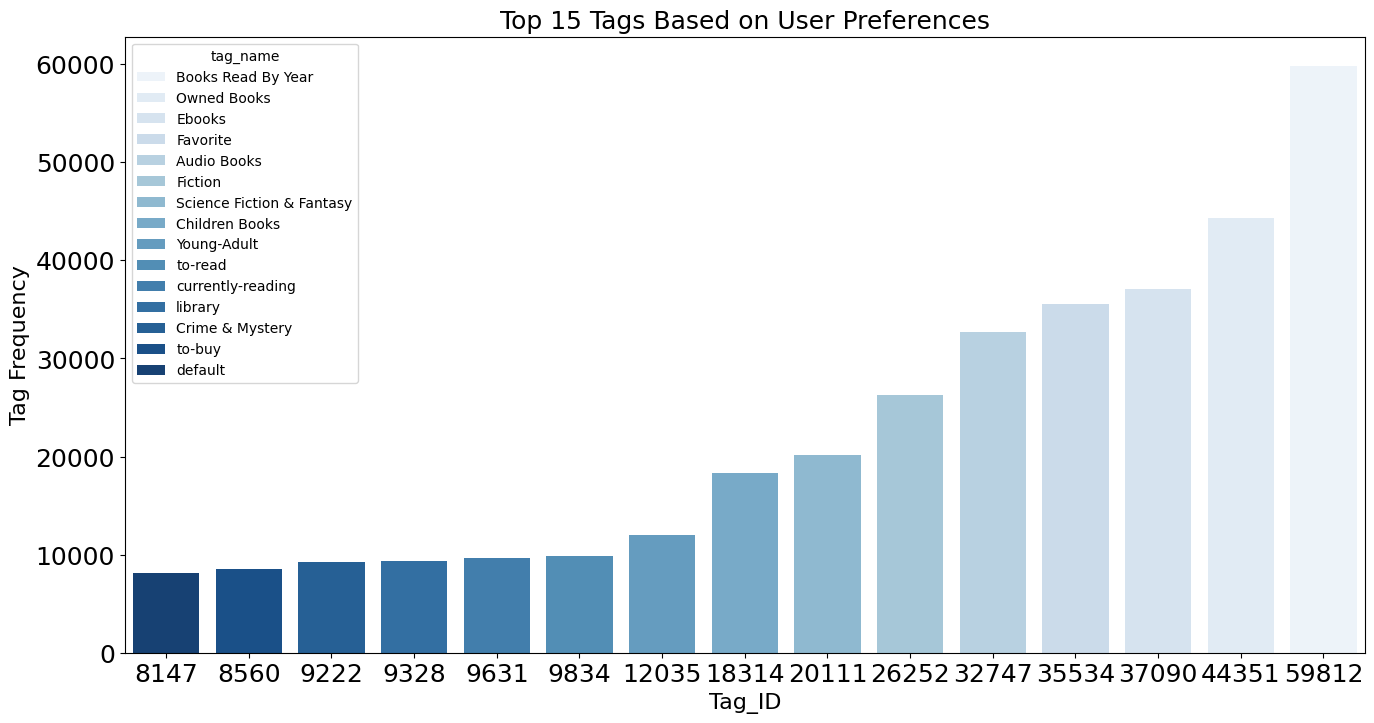

In [140]:
# How Users like to Shelve Their Books
plt.figure(figsize=(16, 8))
g = sns.barplot(x="tag_id", y="Frequency", hue = "tag_name",palette="Blues",data=tag_frequency[0:15][:],dodge=False)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Top 15 Tags Based on User Preferences",fontsize=18)


In [141]:
# Define a function to create a Boolean Mask
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = True
    else:
        dataframe = False
    return dataframe

# Apply the filter function defined above to make a boolean mask to keep only the tags below
tag_names_adult = ['Fiction', 'Non-Fiction','Historical Fiction','Science','History','Women Book List','Crime & Mystery','Science Fiction & Fantasy','romance']
tag_names_to_ya = ['Young-Adult','Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
tag_names_children = ['Children Books']
tag_names_to_keep = tag_names_adult + tag_names_to_ya + tag_names_children
filter = tag_frequency.tag_name.apply(lambda x:Filtered(x,tag_names_to_keep ))

# Use the boolean mask to filter data
tags_for_book_categories = tag_frequency[filter]
tags_for_book_categories.head()

,tag_name,tag_id,Frequency
5,Fiction,26252,26252
6,Science Fiction & Fantasy,20111,20111
7,Children Books,18314,18314
8,Young-Adult,12035,12035
12,Crime & Mystery,9222,9222


In [142]:
def filter_by_age_group(dataframe,adult,young_adult,children):
    if dataframe in adult:
        dataframe = 'Adult'
    if dataframe in young_adult:
        dataframe = 'Young-Adult'
    if dataframe in children:
        dataframe = 'Children/Childhood'
    return dataframe

tags_for_book_categories ['Age_Group'] = tags_for_book_categories.tag_name.apply(lambda x:filter_by_age_group(x,tag_names_adult,tag_names_to_ya,tag_names_children))
tags_for_book_categories.head()

<ipython-input-142-03a0ded3ae51>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags_for_book_categories ['Age_Group'] = tags_for_book_categories.tag_name.apply(lambda x:filter_by_age_group(x,tag_names_adult,tag_names_to_ya,tag_names_children))


,tag_name,tag_id,Frequency,Age_Group
5,Fiction,26252,26252,Adult
6,Science Fiction & Fantasy,20111,20111,Adult
7,Children Books,18314,18314,Children/Childhood
8,Young-Adult,12035,12035,Young-Adult
12,Crime & Mystery,9222,9222,Adult


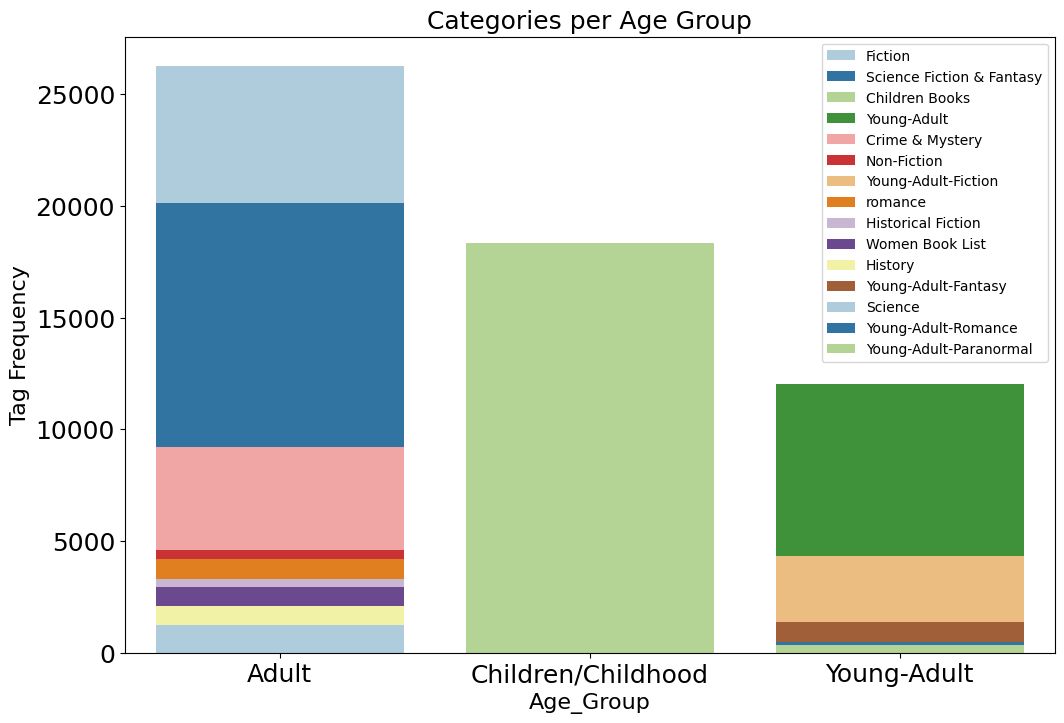

In [143]:
# How Users like to Shelve Their Books
plt.figure(figsize=(12, 8))
g = sns.barplot(x="Age_Group", y="Frequency", hue = "tag_name",palette="Paired",data=tags_for_book_categories[0:15][:],dodge=False)
plt.xlabel( "Age_Group",fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Categories per Age Group",fontsize=18)
plt.legend(loc='upper right')

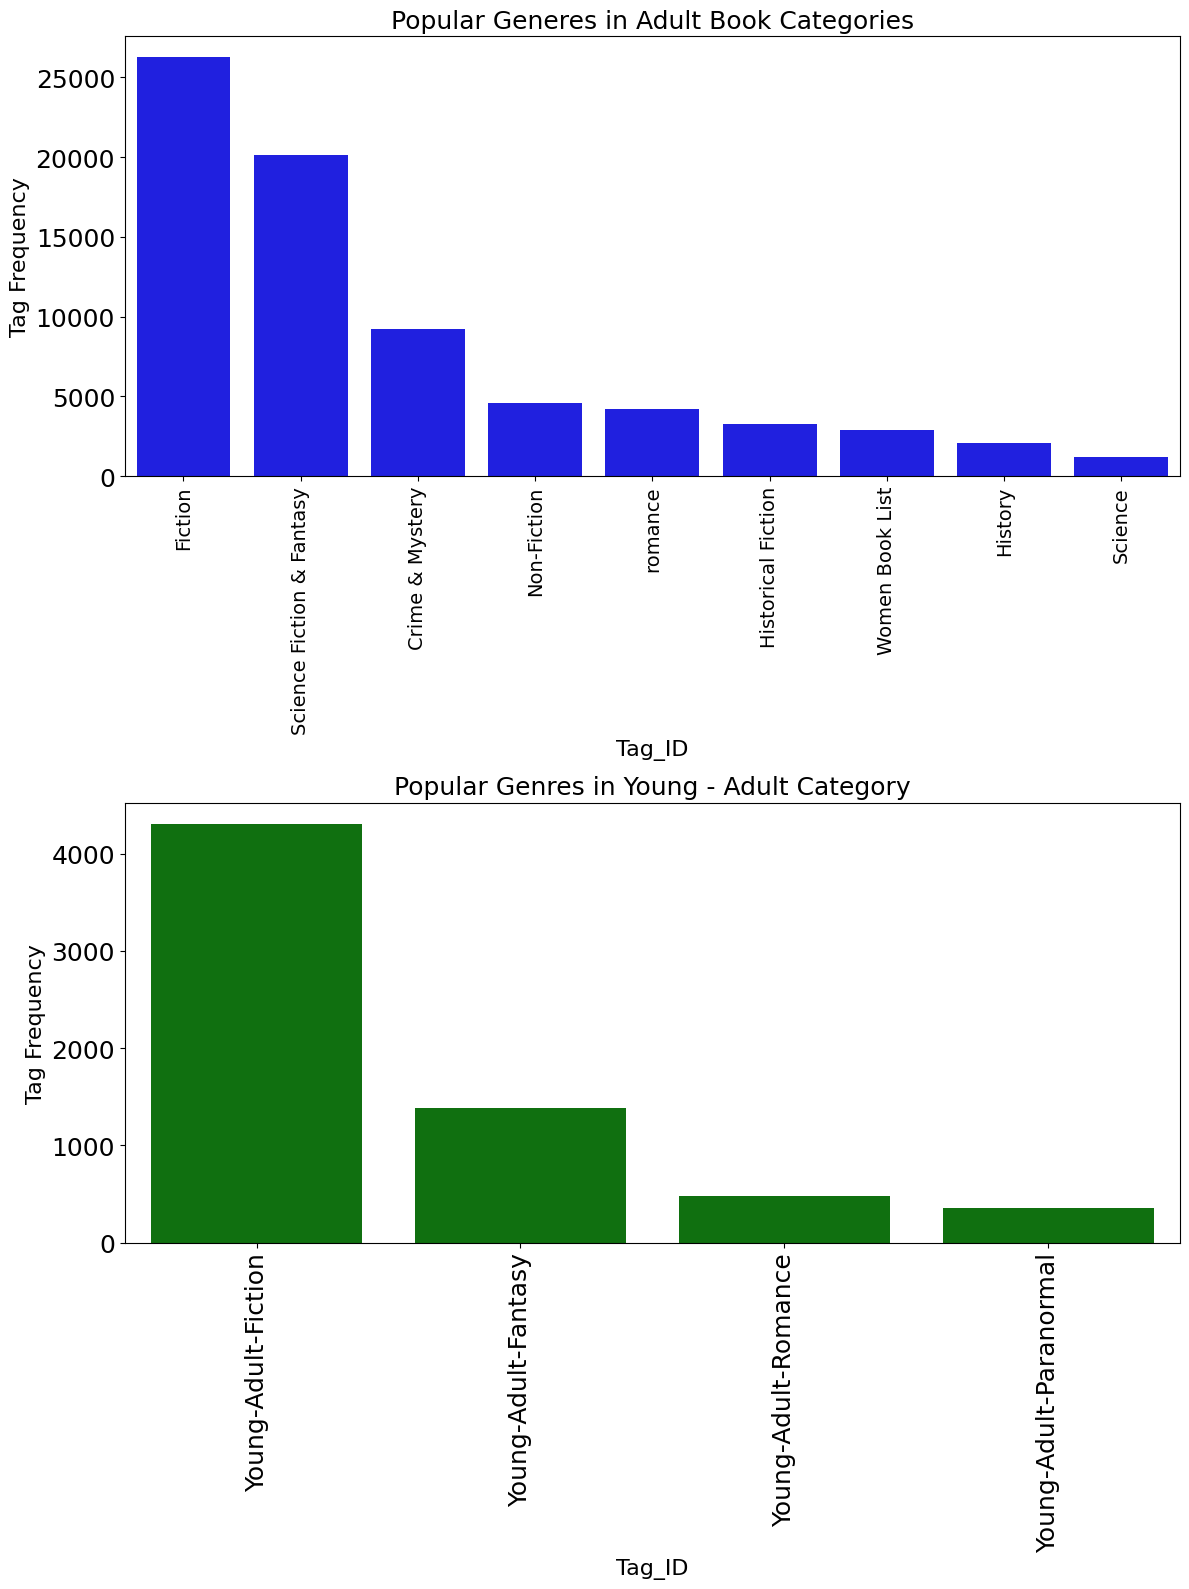

In [144]:
# Plot Popular Adult Subcategories

Freq_Adult_SubCategories = tags_for_book_categories[tags_for_book_categories['Age_Group'] == "Adult"]
plt.figure(figsize = (12, 16))
plt.subplot(2, 1, 1)
g = sns.barplot(x="tag_name", y="Frequency",color="Blue",data=Freq_Adult_SubCategories )
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(  fontsize= 18)
plt.title("Popular Generes in Adult Book Categories",fontsize=18)


# sub-categories in young adult

def filter_YA_Sub_categotires(dataframe,List):
    if dataframe in List:
        dataframe = True
    else:
        dataframe = False
    return dataframe

sub_YA_categories = ['Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
Filter_YA_SubCategories = tags_for_book_categories.tag_name.apply(lambda x:filter_YA_Sub_categotires(x,sub_YA_categories))
Frequent_YA_SubCategories = tags_for_book_categories[Filter_YA_SubCategories]

plt.subplot(2, 1, 2)
g = sns.barplot(x="tag_name", y="Frequency",color="Green",data = Frequent_YA_SubCategories)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 18)
plt.title("Popular Genres in Young - Adult Category",fontsize=18)


plt.tight_layout()
plt.show()

In [145]:
# Top 15 Books Sheleved as Favorites
tag_table_pivot_table = tag_table.pivot_table(index = 'title', columns = 'tag_name', values = 'count', aggfunc='sum' )

#Make a list oftags for all grouped Generes and Favorites
tag_names_to_keep_pivot_table = tag_names_to_keep + ['Favorite']
tag_table_pivot_table = tag_table_pivot_table[tag_names_to_keep_pivot_table]

#Drop cells with NaN in Favorites
tag_table_pivot_table.dropna(axis=0, subset=['Favorite'])

# Rank the books in order of the times they have been tagged as Favorites
tag_table_pivot_table_sorted = tag_table_pivot_table.sort_values(by ='Favorite',ascending = False)
rank_limit = tag_table_pivot_table_sorted.shape[0]
tag_table_pivot_table_sorted['Rank'] = [x+1 for x in range(rank_limit )]


In [146]:
# Top_15_Favorite Books
Top_15_Fav =tag_table_pivot_table_sorted['Favorite'][0:15]
print('Top 15 books based on their tag count as favorites \n')
Top_15_Fav

Top 15 books based on their tag count as favorites 



title
The Hunger Games (The Hunger Games, #1)                        61997.0
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       60036.0
Harry Potter and the Deathly Hallows (Harry Potter, #7)        50777.0
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    50256.0
The Fault in Our Stars                                         43330.0
Harry Potter and the Half-Blood Prince (Harry Potter, #6)      42610.0
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     38064.0
Pride and Prejudice                                            38053.0
To Kill a Mockingbird                                          37430.0
The Book Thief                                                 36551.0
Divergent (Divergent, #1)                                      34910.0
The Perks of Being a Wallflower                                28039.0
Mockingjay (The Hunger Games, #3)                              27367.0
The Great Gatsby                                               24368.0


In [147]:

tag_table_pivot_table_sorted = tag_table_pivot_table_sorted.reset_index()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be plac

(0.0, 50000.0)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


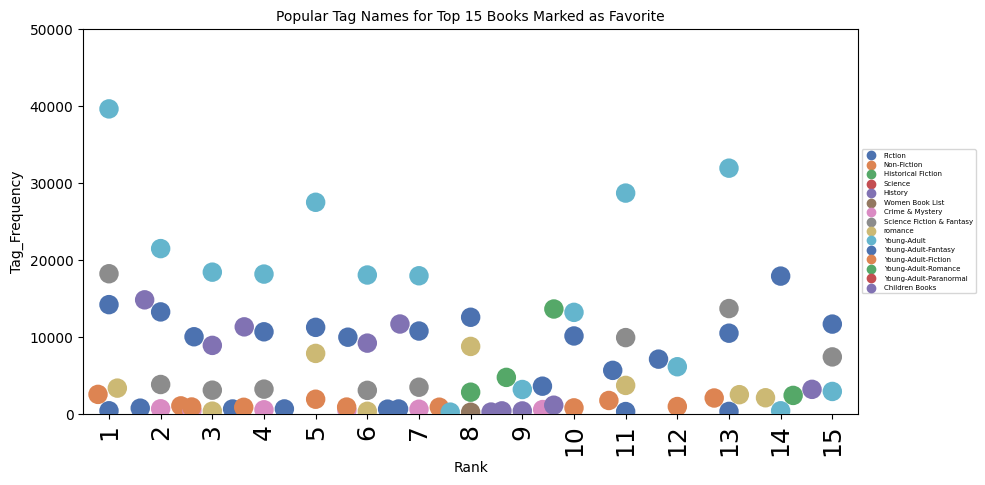

In [151]:
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted[0:15], value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
tag_table_pivot_table_melted.sort_values(by='count',ascending = False)

plt.figure(figsize = (10, 5))
sns.swarmplot(x = 'Rank' ,y = 'count', hue = 'tag_name', palette = 'deep',data = tag_table_pivot_table_melted, size= 14)

plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 10)
plt.xlabel('Rank', fontsize=10)
plt.ylabel( 'Tag_Frequency', fontsize= 10)
plt.title('Popular Tag Names for Top 15 Books Marked as Favorite',fontsize=10)

#put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':5})
plt.ylim(0,50000)
plt.ylim(0,50000)